In [2]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
img_height, img_width, img_channels = 180, 180, 3
batch_size=32
training="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\training"
testing="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\testing"
loading_dataste_seed = 0

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="training",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [5]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [6]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    testing,
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 597 files belonging to 2 classes.


In [7]:
classes = train_data.class_names
shape = (img_height, img_width, img_channels)
data = (train_data, val_data, test_data)

In [8]:
train_data, val_data, test_data = data

In [9]:
inputs = Input(shape= shape)
pretrained_mobilenet_V3_Small = tf.keras.applications.MobileNetV3Small(
    include_top=False,
    classes=len(classes),
    classifier_activation=None
)
for layer in pretrained_mobilenet_V3_Small.layers:
    layer.trainable = False
    layer1 = pretrained_mobilenet_V3_Small(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    mobilenet_V3_small_model = Model(inputs=inputs, outputs=outputs)

4334752/4334752 [==============================] - 0s 0us/step


In [10]:
mobilenet_V3_small_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mobilenet_V3_small_model.summary()

Model: "model_228"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, None, None, 576)  939120    
 l)                                                              
                                                                 
 flatten_228 (Flatten)       (None, 14400)             0         
                                                                 
 dense_456 (Dense)           (None, 128)               1843328   
                                                                 
 dense_457 (Dense)           (None, 2)                 258       
                                                                 
Total params: 2,782,706
Trainable params: 1,843,586
Non-trainable params: 939,120
_________________________________________

In [11]:

mobilenet_V3_small_model_hist = mobilenet_V3_small_model.fit(
  train_data,
  validation_data=val_data,
  epochs=7
)

Epoch 1/7
60/60 [==============================] - 48s 619ms/step - loss: 1.8825 - accuracy: 0.8918 - val_loss: 0.9446 - val_accuracy: 0.9874
Epoch 2/7
60/60 [==============================] - 37s 582ms/step - loss: 0.7080 - accuracy: 0.9916 - val_loss: 0.5225 - val_accuracy: 0.9937
Epoch 3/7
60/60 [==============================] - 37s 583ms/step - loss: 0.4352 - accuracy: 0.9906 - val_loss: 0.3643 - val_accuracy: 0.9854
Epoch 4/7
60/60 [==============================] - 37s 590ms/step - loss: 0.3571 - accuracy: 0.9801 - val_loss: 0.3291 - val_accuracy: 0.9916
Epoch 5/7
60/60 [==============================] - 34s 541ms/step - loss: 0.2789 - accuracy: 0.9875 - val_loss: 0.2657 - val_accuracy: 0.9833
Epoch 6/7
60/60 [==============================] - 34s 543ms/step - loss: 0.2231 - accuracy: 0.9890 - val_loss: 0.2051 - val_accuracy: 0.9854
Epoch 7/7
60/60 [==============================] - 36s 577ms/step - loss: 0.1753 - accuracy: 0.9932 - val_loss: 0.1790 - val_accuracy: 0.9833


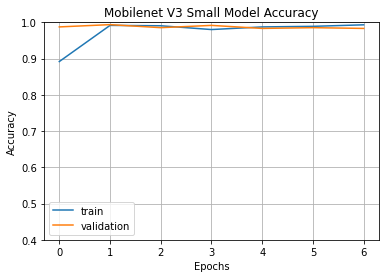

In [12]:
plt.plot(mobilenet_V3_small_model_hist.history['accuracy'])
plt.plot(mobilenet_V3_small_model_hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Mobilenet V3 Small Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def eval_model(model, test_data):   
    results={}
    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

    # Accuracy
    results['accuracy'] = accuracy_score(true_labels, predicted_labels)
    
    # F1 Score
    results['f1_score'] = f1_score(true_labels, predicted_labels)
        
    cm = confusion_matrix(true_labels, predicted_labels)
    
    class_names = test_data.class_names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return results

1/1 [==============================] - 2s 2s/step


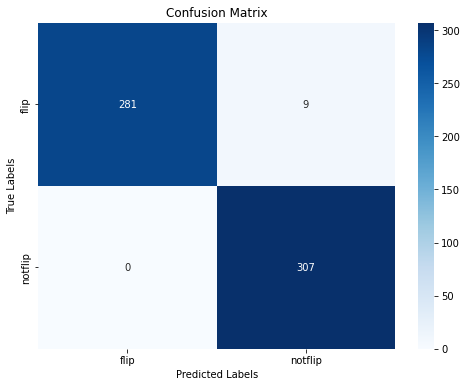

{'accuracy': 0.9849246231155779, 'f1_score': 0.985553772070626}

In [16]:
import seaborn as sns
eval_model(mobilenet_V3_small_model, test_data)

In [17]:
mobilenet_V3_small_model_path = '../models/mobilenet_V3_small_model.h5'
mobilenet_V3_small_model.save(mobilenet_V3_small_model_path)
mobilenet_V3_small_model_size = os.path.getsize(mobilenet_V3_small_model_path) / (1024 * 1024)
print('Model size: ', mobilenet_V3_small_model_size, 'MB')

Model size:  24.97901153564453 MB
